### Clustering Modeling Exercises

Do your work for this exercise in a notebook named modeling within your clustering-exercises repository.

In [135]:
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import env
import requests
from matplotlib import cm
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from pydataset import data

np.random.seed(4)

1. Clustering with the Iris Dataset

Using this lesson as a guide, perform clustering on the iris dataset.

    a. Choose features other than the ones used in the lesson.
    b. Visualize the results of your clustering.
    c. Use the elbow method to visually select a good value for k.
    d. Repeat the clustering, this time with 3 different features.

In [31]:
# import data
iris = data('iris')
iris.head()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
1,5.1,3.5,1.4,0.2,setosa
2,4.9,3.0,1.4,0.2,setosa
3,4.7,3.2,1.3,0.2,setosa
4,4.6,3.1,1.5,0.2,setosa
5,5.0,3.6,1.4,0.2,setosa


In [32]:
# rename columns
iris.rename(columns = {"Sepal.Length":"sepal_length", "Sepal.Width":"sepal_width", "Petal.Length":"petal_length", "Petal.Width":"petal_width", "Species":"species"}, inplace = True)
iris.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 150 entries, 1 to 150
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 7.0+ KB


In [73]:
# feature selection 

X = iris[['petal_length', 'petal_width']]

In [74]:
# scale dataset

scaler = StandardScaler().fit(X)
X_scaled = pd.DataFrame(scaler.transform(X), columns= X.columns).set_index([X.index.values])

In [75]:
kmeans = KMeans(n_clusters = 4)
kmeans.fit(X_scaled)
kmeans.predict(X_scaled)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 2, 2, 1, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 1, 2, 1, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 1, 2, 1, 1, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 1, 3, 1, 3, 3, 1, 3, 1, 3,
       1, 1, 3, 1, 3, 3, 1, 3, 3, 1, 3, 1, 3, 1, 3, 1, 1, 1, 3, 1, 3, 3,
       3, 1, 1, 3, 3, 1, 1, 3, 3, 3, 1, 3, 3, 3, 1, 1, 3, 1], dtype=int32)

In [76]:
def viz_iris(iris, kmeans):
    
    centroids = np.array(iris.groupby('cluster')['petal_length', 'petal_width'].mean())
    cen_x = [i[0] for i in centroids]
    cen_y = [i[1] for i in centroids]
    # cen_x = [i[0] for i in kmeans.cluster_centers_]
    # cen_y = [i[1] for i in kmeans.cluster_centers_]
    iris['cen_x'] = iris.cluster.map({0:cen_x[0], 1:cen_x[1], 2:cen_x[2]})
    iris['cen_y'] = iris.cluster.map({0:cen_y[0], 1:cen_y[1], 2:cen_y[2]})

    colors = ['#DF2020','#2095DF', '#81DF20', '#C7B8D1' ]
    iris['c'] = iris.cluster.map({0:colors[0], 1:colors[1], 2:colors[2], 3:colors[3]})
    #plot scatter chart for Actual species and those predicted by K - Means

    #specify custom palette for sns scatterplot
    colors1 = ['#C7B8D1','#2095DF','#81DF20' ,'#DF2020']
    customPalette = sns.set_palette(sns.color_palette(colors1))

    #plot the scatterplots

    #Define figure (num of rows, columns and size)
    fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(10,10))

    # plot ax1 
    ax1 = plt.subplot(2,1,1) 
    sns.scatterplot(data = iris, x = 'petal_length', y = 'petal_width', ax = ax1, hue = 'species', palette=customPalette)
    plt.title('Actual Species')

    #plot ax2
    ax2 = plt.subplot(2,1,2) 
    ax2.scatter(iris.petal_length, iris.petal_width, c=iris.c, alpha = 0.6, s=10)
    ax2.set(xlabel = 'petal_length', ylabel = 'petal_width', title = 'K - Means')

    # plot centroids on  ax2
    ax2.scatter(cen_x, cen_y, marker='X', c=colors, s=200)
    
    
    iris.drop(columns = ['cen_x', 'cen_y', 'c'], inplace = True)
    plt.tight_layout()
    plt.show()

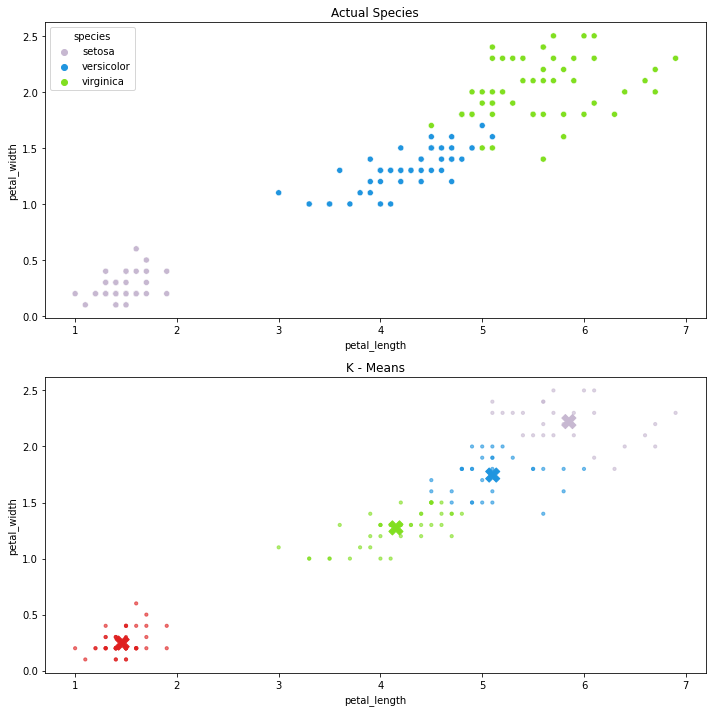

In [77]:
iris['cluster'] = kmeans.predict(X_scaled)
iris['cluster'] = kmeans.predict(X_scaled)
# Visualize the scatter plot for Actual vs predicted (K-Means)
viz_iris(iris, kmeans)

In [78]:
centroids_scaled = pd.DataFrame(kmeans.cluster_centers_, columns = X.columns)
centroids_scaled
X_scaled['cluster'] = kmeans.predict(X_scaled)

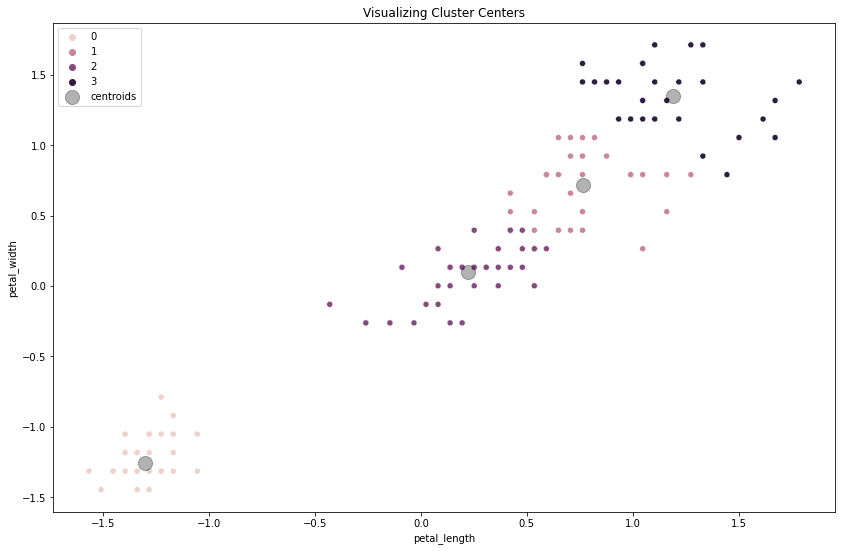

In [79]:
plt.figure(figsize=(14, 9))

# scatter plot of data with hue for cluster
sns.scatterplot(x = 'petal_length', y ='petal_width', data = X_scaled, hue = 'cluster')

# plot cluster centers (centroids)
centroids_scaled.plot.scatter(x = 'petal_length', y = 'petal_width',
                             ax = plt.gca(),
                             s = 200,
                             color = 'k',
                             alpha = 0.3,
                             label = 'centroids')

plt.title('Visualizing Cluster Centers')
plt.legend();

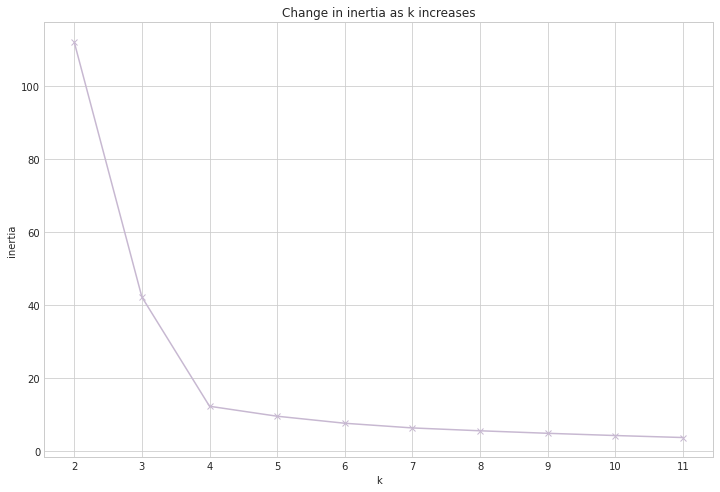

In [80]:
with plt.style.context('seaborn-whitegrid'):
    plt.figure(figsize=(12, 8))
    pd.Series({k: KMeans(k).fit(X_scaled).inertia_ for k in range(2, 12)}).plot(marker='x')
    plt.xticks(range(2, 12))
    plt.xlabel('k')
    plt.ylabel('inertia')
    plt.title('Change in inertia as k increases')

In [81]:
# feature selection 

X = iris[['petal_length', 'petal_width', 'sepal_width']]

In [82]:
# scale dataset

scaler = StandardScaler().fit(X)
X_scaled = pd.DataFrame(scaler.transform(X), columns= X.columns).set_index([X.index.values])

In [83]:
kmeans = KMeans(n_clusters = 4)
kmeans.fit(X_scaled)
kmeans.predict(X_scaled)

array([0, 3, 3, 3, 0, 0, 3, 3, 3, 3, 0, 3, 3, 3, 0, 0, 0, 0, 0, 0, 3, 0,
       0, 3, 3, 3, 3, 0, 3, 3, 3, 3, 0, 0, 3, 3, 0, 0, 3, 3, 0, 3, 3, 0,
       0, 3, 0, 3, 0, 3, 1, 1, 1, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 1, 1, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 1, 1, 1, 1, 2, 1, 2, 1,
       1, 2, 1, 2, 1, 1, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 2, 1, 1, 1, 1, 1,
       1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 1], dtype=int32)

In [90]:
def viz_iris(iris, kmeans):
    
    centroids = np.array(iris.groupby('cluster')['petal_length', 'petal_width', 'sepal_width'].mean())
    cen_x = [i[0] for i in centroids]
    cen_y = [i[1] for i in centroids]
    # cen_x = [i[0] for i in kmeans.cluster_centers_]
    # cen_y = [i[1] for i in kmeans.cluster_centers_]
    iris['cen_x'] = iris.cluster.map({0:cen_x[0], 1:cen_x[1], 2:cen_x[2]})
    iris['cen_y'] = iris.cluster.map({0:cen_y[0], 1:cen_y[1], 2:cen_y[2]})

    colors = ['#DF2020','#2095DF', '#81DF20', '#C7B8D1' ]
    iris['c'] = iris.cluster.map({0:colors[0], 1:colors[1], 2:colors[2], 3:colors[3]})
    #plot scatter chart for Actual species and those predicted by K - Means

    #specify custom palette for sns scatterplot
    colors1 = ['#C7B8D1','#2095DF','#81DF20' ,'#DF2020']
    customPalette = sns.set_palette(sns.color_palette(colors1))

    #plot the scatterplots

    #Define figure (num of rows, columns and size)
    fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(10,10))

    # plot ax1 
    ax1 = plt.subplot(4,1,1) 
    sns.scatterplot(data = iris, x = 'petal_length', y = 'petal_width', ax = ax1, hue = 'species', palette=customPalette)
    plt.title('Actual Species')

    #plot ax2
    ax2 = plt.subplot(4,1,2) 
    ax2.scatter(iris.petal_length, iris.petal_width, c=iris.c, alpha = 0.6, s=10)
    ax2.set(xlabel = 'petal_length', ylabel = 'petal_width', title = 'K - Means')
    

    # plot centroids on  ax2
    ax2.scatter(cen_x, cen_y, marker='X', c=colors, s=200)
    
    # plot ax3
    ax3 = plt.subplot(4,1,3)
    ax3.scatter(iris.petal_length, iris.sepal_width, c = iris.c, alpha = 0.6, s = 10)
    ax3.set(xlabel = 'petal_length', ylabel = 'sepal_width', title = 'K - Means')
    
    # plot ax4
    ax4 = plt.subplot(4,1,4)
    ax4.scatter(iris.petal_width, iris.sepal_width, c = iris.c, alpha = 0.6, s = 10)
    ax4.set(xlabel = 'petal_width', ylabel = 'sepal_width', title = 'K - Means')
    
    iris.drop(columns = ['cen_x', 'cen_y', 'c'], inplace = True)
    plt.tight_layout()
    plt.show()

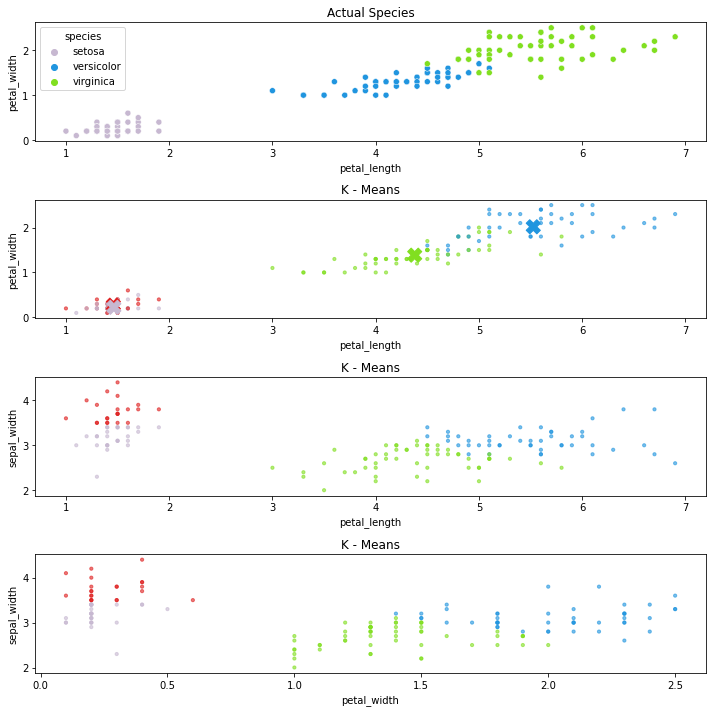

In [91]:
iris['cluster'] = kmeans.predict(X_scaled)
iris['cluster'] = kmeans.predict(X_scaled)
# Visualize the scatter plot for Actual vs predicted (K-Means)
viz_iris(iris, kmeans)

In [92]:
centroids_scaled = pd.DataFrame(kmeans.cluster_centers_, columns = X.columns)
centroids_scaled
X_scaled['cluster'] = kmeans.predict(X_scaled)

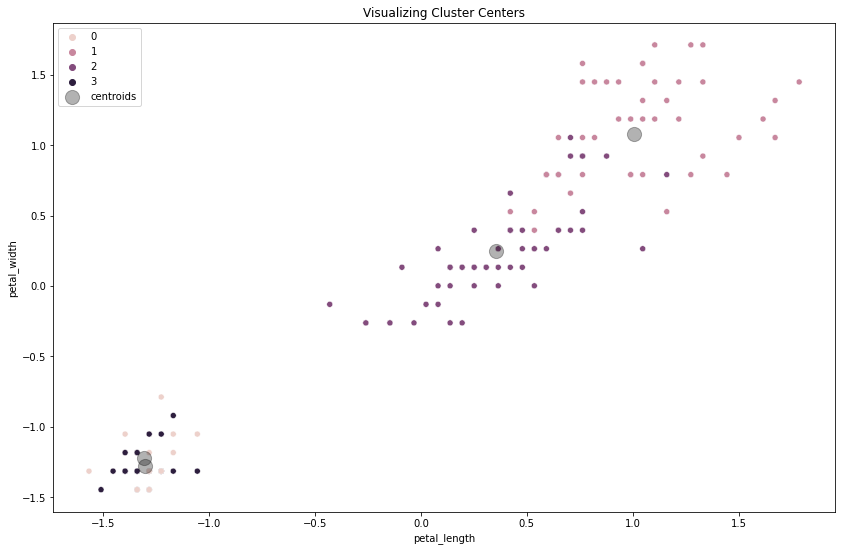

In [93]:
plt.figure(figsize=(14, 9))

# scatter plot of data with hue for cluster
sns.scatterplot(x = 'petal_length', y ='petal_width', data = X_scaled, hue = 'cluster')

# plot cluster centers (centroids)
centroids_scaled.plot.scatter(x = 'petal_length', y = 'petal_width',
                             ax = plt.gca(),
                             s= 200,
                             color = 'k',
                             alpha = 0.3,
                             label = 'centroids')

plt.title('Visualizing Cluster Centers')
plt.legend();

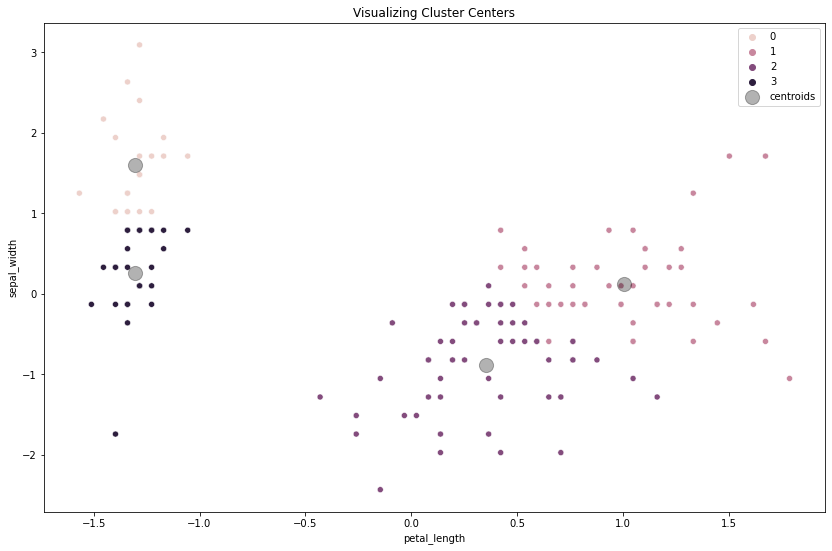

In [94]:
plt.figure(figsize=(14, 9))

# scatter plot of data with hue for cluster
sns.scatterplot(x = 'petal_length', y ='sepal_width', data = X_scaled, hue = 'cluster')

# plot cluster centers (centroids)
centroids_scaled.plot.scatter(x = 'petal_length', y = 'sepal_width',
                             ax = plt.gca(),
                             s= 200,
                             color = 'k',
                             alpha = 0.3,
                             label = 'centroids')

plt.title('Visualizing Cluster Centers')
plt.legend();

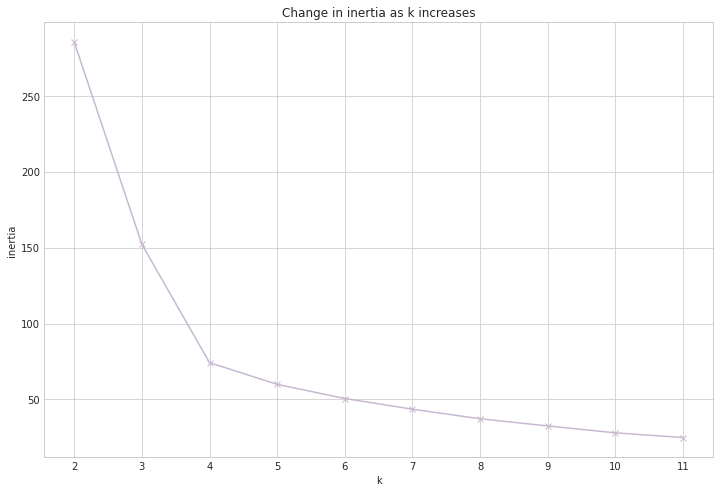

In [95]:
with plt.style.context('seaborn-whitegrid'):
    plt.figure(figsize=(12, 8))
    pd.Series({k: KMeans(k).fit(X_scaled).inertia_ for k in range(2, 12)}).plot(marker='x')
    plt.xticks(range(2, 12))
    plt.xlabel('k')
    plt.ylabel('inertia')
    plt.title('Change in inertia as k increases')

2. Use the techniques discussed in this lesson, as well as the insights gained from the exploration exercise to perform clustering on the mall customers dataset. Be sure to visualize your results!

In [97]:
def get_connection(db, user = env.user, host = env.host, password = env.password):
    '''
    This function uses my info from my env file to
    create a connection url to access the Codeup db.
    It takes in a string name of a database as an argument.
    '''
    return f'mysql+pymysql://{user}:{password}@{host}/{db}'
    
def mall_cust_data():
    '''
    This function reads the iris data from the Codeup db into a df.
    '''
    sql_query = """
                SELECT * FROM customers;                
                """
    
    # Read in DataFrame from Codeup db.
    df = pd.read_sql(sql_query, get_connection('mall_customers'))
    
    return df

In [98]:
customers = mall_cust_data()
customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   customer_id     200 non-null    int64 
 1   gender          200 non-null    object
 2   age             200 non-null    int64 
 3   annual_income   200 non-null    int64 
 4   spending_score  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [106]:
customers.describe().T

,count,mean,std,min,25%,50%,75%,max
customer_id,200.0,100.50,57.879185,1.0,50.75,100.5,150.25,200.0
age,200.0,38.85,13.969007,18.0,28.75,36.0,49.00,70.0
annual_income,200.0,60.56,26.264721,15.0,41.50,61.5,78.00,137.0
spending_score,200.0,50.20,25.823522,1.0,34.75,50.0,73.00,99.0


In [101]:
customers.head()

,customer_id,gender,age,annual_income,spending_score
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [108]:
# independent variable assignment
X = customers[['age', 'annual_income', 'spending_score']]

In [109]:
# scale X

scaler = StandardScaler().fit(X)
X_scaled = pd.DataFrame(scaler.transform(X), columns = X.columns).set_index([X.index.values])

In [110]:
kmeans = KMeans(n_clusters = 2, random_state = 123)
kmeans.fit(X_scaled)
kmeans.predict(X_scaled)

array([1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1,
       1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1,
       1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1], dtype=int32)

In [111]:
customers['cluster'] = kmeans.predict(X_scaled)
X_scaled['cluster'] = kmeans.predict(X_scaled)

In [130]:
def viz_customers(customers, kmeans):
    
    centroids = np.array(customers.groupby('cluster')['age', 'annual_income', 'spending_score'].mean())
    cen_x = [i[0] for i in centroids]
    cen_y = [i[1] for i in centroids]
    # cen_x = [i[0] for i in kmeans.cluster_centers_]
    # cen_y = [i[1] for i in kmeans.cluster_centers_]
    customers['cen_x'] = customers.cluster.map({0:cen_x[0], 1:cen_x[1]})
    customers['cen_y'] = customers.cluster.map({0:cen_y[0], 1:cen_y[1]})

    colors = ['#DF2020','#2095DF']
    customers['c'] = customers.cluster.map({0:colors[0], 1:colors[1]})
    #plot scatter chart for Actual species and those predicted by K - Means

    #specify custom palette for sns scatterplot
    colors1 = ['#2095DF','#DF2020']
    customPalette = sns.set_palette(sns.color_palette(colors1))

    #plot the scatterplots

    #Define figure (num of rows, columns and size)
    fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(10,10))

    # plot ax1 
    ax1 = plt.subplot(4,1,1) 
    sns.scatterplot(data = customers, x = 'age', y = 'annual_income', ax = ax1, hue = 'gender', palette=customPalette)
    
    #plot ax2
    ax2 = plt.subplot(4,1,2)
    sns.scatterplot(data = customers, x = 'age', y = 'spending_score', ax = ax2, hue = 'gender', palette = customPalette)

    #plot ax3
    ax3 = plt.subplot(4,1,3) 
    ax3.scatter(customers.age, customers.annual_income, c=customers.c, alpha = 0.6, s=10)
    ax3.set(xlabel = 'age', ylabel = 'annual_income', title = 'K - Means')

    # plot centroids on  ax3
    ax3.scatter(cen_x, cen_y, marker='X', c=colors, s=200)
    
    #plot ax4
    ax4 = plt.subplot(4,1,4)
    ax4.scatter(customers.spending_score, customers.annual_income, c=customers.c, alpha = 0.6, s = 10)
    ax4.set(xlabel = 'age', ylabel = 'spending_score', title = 'K - Means')
    
    customers.drop(columns = ['cen_x', 'cen_y', 'c'], inplace = True)
    plt.tight_layout()
    plt.show()

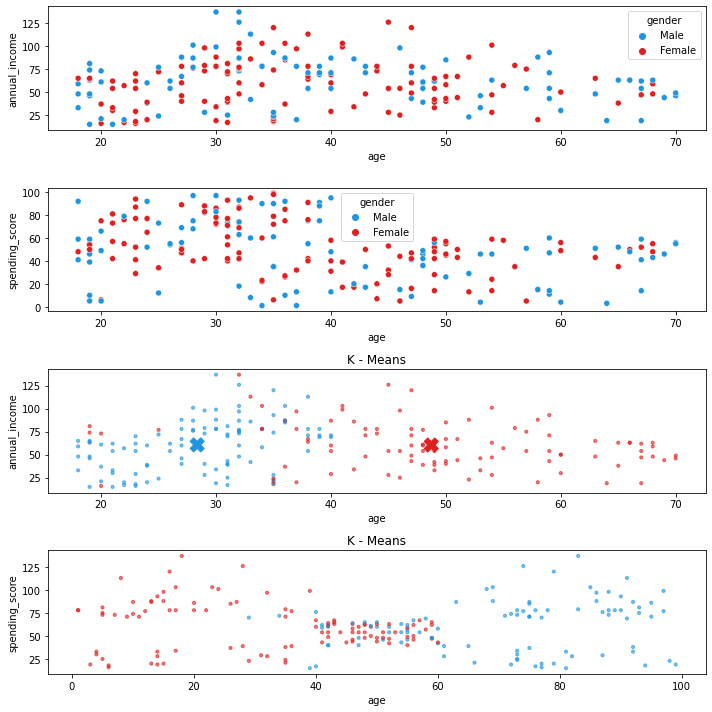

In [131]:
viz_customers(customers, kmeans)

3. How does scaling impact the results of clustering?

Compare k-means clustering results on scaled and unscaled data (you can choose any dataset for this exercise OR use the data/steps outlined in the bonus below). You can show how the resulting clusters differ either with descriptive statistics or visually.

#### Bonus: 

a) Read in the data from this google sheet: https://docs.google.com/spreadsheets/d/1j5EgXVTR5ikUj3G5ZCQmkq6ziz_gvtASGAdw23-5_6M/edit?usp=sharing

b) Visualize the data and guess the number and shape of the clusters.

c) Implement the KMeans algorithm on unscaled data and visualize the clusters.

d) Repeat the step above but with scaled data. 

c) Write down the takeaways from this exercise.

In [142]:
url = "https://docs.google.com/spreadsheets/d/1j5EgXVTR5ikUj3G5ZCQmkq6ziz_gvtASGAdw23-5_6M/edit?usp=sharing"
csv_export_url = url.replace('/edit?', '/export?format=csv&')
cluster_df = pd.read_csv(csv_export_url)
cluster_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x       800 non-null    float64
 1   y       800 non-null    float64
dtypes: float64(2)
memory usage: 12.6 KB


In [144]:
cluster_df.describe().T

,count,mean,std,min,25%,50%,75%,max
x,800.0,0.508449,9.906209,-30.572062,-6.068600,0.581809,7.579269,29.489457
y,800.0,2.973206,3.156376,-3.146259,-0.047636,3.040642,5.996474,8.817347


array([[<AxesSubplot:title={'center':'x'}>,
        <AxesSubplot:title={'center':'y'}>]], dtype=object)

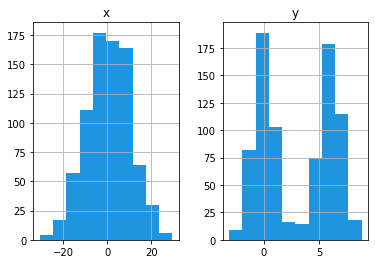

In [145]:
cluster_df.hist()

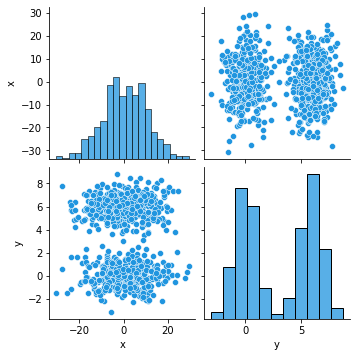

In [147]:
sns.pairplot(cluster_df)

In [148]:
X = cluster_df[['x', 'y']]
X.head()

,x,y
0,-3.641747,0.121540
1,-7.620447,1.810897
2,-6.505373,0.068072
3,7.730963,0.585521
4,17.283668,0.344804


In [149]:
kmeans = KMeans(n_clusters = 2, random_state = 123)
kmeans.fit(X)
kmeans.predict(X)

array([1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0,
       1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0,
       0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1,
       1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0,
       1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1,
       1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1,
       0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0,
       1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0,

In [150]:
cluster_df['cluster'] = kmeans.predict(X)

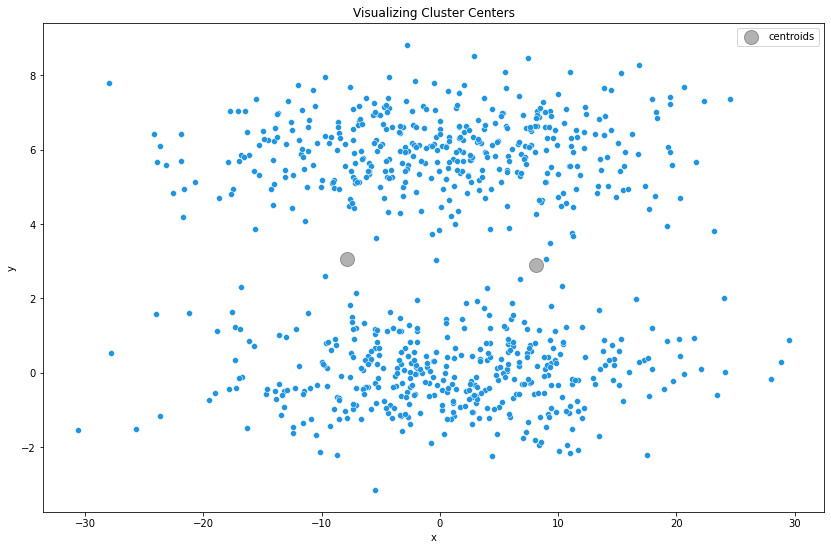

In [153]:
plt.figure(figsize=(14, 9))

# scatter plot of data with hue for cluster
sns.scatterplot(x = 'x', y ='y', data = cluster_df)

centroids = cluster_df.groupby('cluster')['x', 'y'].mean()
# plot cluster centers (centroids)
centroids.plot.scatter(x = 'x', y = 'y',
                             ax = plt.gca(),
                             s= 200,
                             color = 'k',
                             alpha = 0.3,
                             label = 'centroids')

plt.title('Visualizing Cluster Centers')
plt.legend();

In [160]:
def viz_cluster(cluster_df, kmeans):
    
    centroids = np.array(cluster_df.groupby('cluster')['x', 'y'].mean())
    cen_x = [i[0] for i in centroids]
    cen_y = [i[1] for i in centroids]
    # cen_x = [i[0] for i in kmeans.cluster_centers_]
    # cen_y = [i[1] for i in kmeans.cluster_centers_]
    cluster_df['cen_x'] = cluster_df.cluster.map({0:cen_x[0], 1:cen_x[1]})
    cluster_df['cen_y'] = cluster_df.cluster.map({0:cen_y[0], 1:cen_y[1]})

    #plot the scatterplots

    #Define figure (num of rows, columns and size)
    fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(10,10))

    # plot ax1 
    ax1 = plt.subplot(2,1,1) 
    sns.scatterplot(data = cluster_df, x = 'x', y = 'y', ax = ax1)
    plt.title('Actual x/y')

    #plot ax2
    ax2 = plt.subplot(2,1,2) 
    ax2.scatter(cluster_df.x, cluster_df.y, alpha = 0.6, s=10)
    ax2.set(xlabel = 'x', ylabel = 'y', title = 'K - Means')

    # plot centroids on  ax2
    ax2.scatter(cen_x, cen_y, marker='X', s=200)
    
    
    cluster_df.drop(columns = ['cen_x', 'cen_y'], inplace = True)
    plt.tight_layout()
    plt.show()

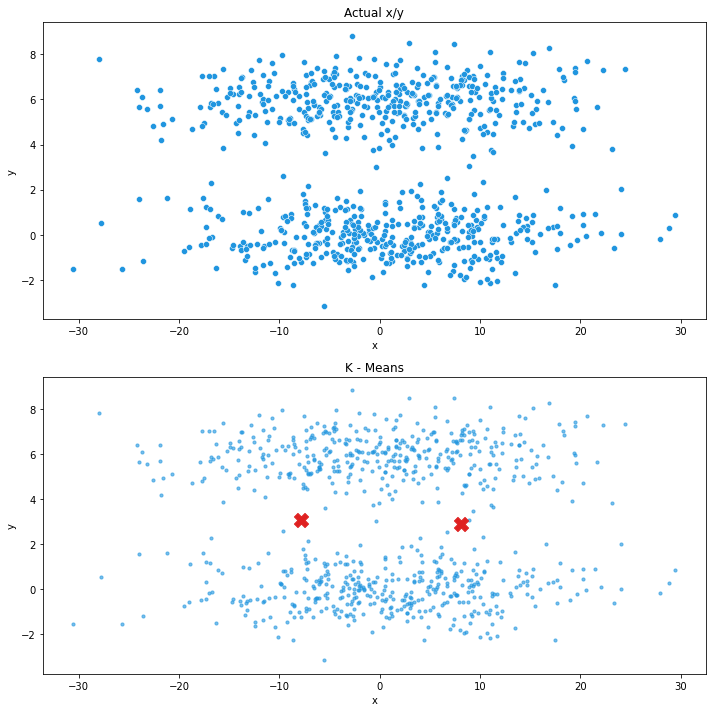

In [161]:
viz_cluster(cluster_df, kmeans)

In [ ]:
## need to do the scaled version of number 3!!